# Project: Investigate a Dataset - [tmdb-movies.csv]


## Introduction

### Dataset Description 

TMDb movie dataset is a collection of over 10000 movies from The movie database(TMDb). The dataset has 21 columns starting with the,  
1. Id: this is basically is a unique idenfier of the movie in the table data
2. imdb_id: a unique identifer of the movie in the database.
3. popularity:  movie rating
4. budget: money spent on the production of the movie.
5. revenue: The amount of money a movie fetched.
6. original_title: The title of the movie
7. cast: Members who took part in making the movie.
8. homepage: a url of the website of a movie.
9. director: The person involved in creating the movie
10. tagline:                  
11. keywords                
12. overview: General idea of what the movie is about.                
13. runtime: how long a movie runs                 
14. genres: Classification of a movie.                 
15. production_companies: The companies that produced the movie.    
16. release_date: The date, month and year movie was released.           
17. vote_count : The number of vote a movie garnered.            
18. vote_average: The average vote a movie got.            
19. release_year: The year a movie was released            
20. budget_adj: Budget adjustment accounting for inflation over time.       
21. revenue_adj: Budget adjustment accounting for inflation over time.          


### Questions for Analysis
 1. Which genres are most popular from year to year? 
 2. What kinds of properties are associated with movies that have high revenues?

# Data Wrangling

In [1]:
# Import pandas and other libraries that will be used in the data analysis process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# pd.set_option('display.max_rows', 22)

In [3]:
# Read the data using pandas, and get an overview of the forst five rows using .head()
moviesdf = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
moviesdf.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Check presence of duplicates in the data

In [4]:
moviesdf.duplicated().sum()

1

There is one duplicated row data in the dataframe, which therefore needs to be dropped.

In [5]:
# Drop duplicated rows
moviesdf.drop_duplicates(inplace=True)

Get an overview of the shape of dataframe

In [6]:
moviesdf.shape

(10865, 21)

There dataframe has 10865 entries of movie data and 21 columns.

In [7]:
# Get a summary of statistical overview of the dataframe
moviesdf.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the summary statistics, the data has movies released from as early as 1960 to the year 2015. The longest of the movie has a runtime of 900. The average runtime of the movies is at 99. 

In [8]:
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

Drop columns that will not be used in the data analysis process

In [9]:
moviesdf.drop(['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'overview', 'keywords', 'release_date'], axis=1, inplace=True)

In [10]:
moviesdf.head()

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
moviesdf.shape

(10865, 13)

# Exploratory Data Analysis

# What genres are most popular from year to year

Group the data by year (release_year) and then get the most popular of the grouped data for each year and asssign it into a new dataframe called populargenredf.

Get the genres and popularity columns and view an overview of how the data looks like using .head()

In [12]:
# Group the data by year and query for the specific columns required in the analysis process
groupedbyyeardf = moviesdf.groupby('release_year')
populargenredf = groupedbyyeardf.first()[['genres','popularity']]
populargenredf.head()

,genres,popularity
release_year,,
1960,Drama|Horror|Thriller,2.610362
1961,Adventure|Animation|Comedy|Family,2.631987
1962,Adventure|Action|Thriller,3.170651
1963,Action|Thriller|Adventure,2.508235
1964,Adventure|Action|Thriller,3.153791


The genres column features a combination of multiple genres separated by pipe(|). To get a particular genre, iterate over the column and separate on the pipe character.

Let's import Counter() from python's collections module. We import this our imports cell at the very top of this jupyter notebook

We create a dictionary key, value pairs with the name of the genres as the keys and the number of times it features as the value.  Then we iterate over the dictionary to create two lists, one with the genres and the other with the corresponding counts of the times it occurs over the years.

In [13]:
#  create a counter to count how many times a particular genre appears over the years

genres = populargenredf['genres']

genrecount = Counter()
for genre in genres:
    genrecount.update(genre.split('|'))

genrelist = []
countlist = []

for g in genrecount.items():
    genrelist.append(g[0])
    countlist.append(g[1])

print(countlist)
print(genrelist)

[13, 4, 19, 30, 9, 7, 11, 28, 19, 3, 7, 2, 2, 10]
['Drama', 'Horror', 'Thriller', 'Adventure', 'Animation', 'Comedy', 'Family', 'Action', 'Science Fiction', 'Mystery', 'Crime', 'Music', 'Romance', 'Fantasy']


Once we have the genres and their corresponding count, we plot the results using matplotlib

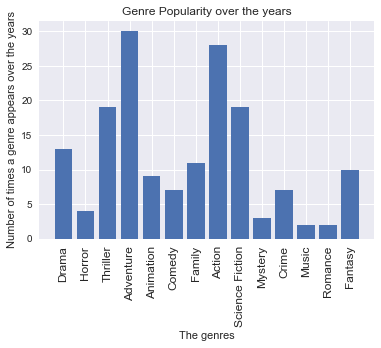

In [14]:
# plot the graph, and rotate the xticks for visibility.
plt.bar(genrelist, countlist)
plt.title('Genre Popularity over the years')
plt.xlabel('The genres')
plt.ylabel('Number of times a genre appears over the years')
plt.xticks(genrelist, rotation='vertical', size=12);

In [15]:
# Have a look at the popular genre dataframe result set.
populargenredf.shape

(56, 2)

The most popular genres over the years is Adventure with 30 entries out of the total 56, followed closely by Action with 28 entries, Thriller and Science fiction with 19 entries the Drama at 13 and so forth.

# What kind of properties are associated with movies that have high revenue

Scanning through the data, there are movie entries that have zero budget and zero revenue, let's filter the datframe to see how many entries fetched zero revenue.

In [16]:
# Get the shape of the movies that didn't generate any revenue
moviesdf[(moviesdf['revenue']== 0)].shape

(6016, 13)

There are over 6000 movies that didn't fecth any revenue, which will be quite significant for our analysis. Let's filter through the dataframe to get movies that fetched some sort of revenue.

To get this, let's filter out movies with zero revenue and assign it to a new datafarame called highrevenuedf

In [17]:
# Filter out movies that fetched some revenue and view the first few entries
highrevenuedf = moviesdf[moviesdf['revenue'] != 0]
highrevenuedf.head(3)

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


Now that we have data entries that fetched revenue, let's have a quick overview of the summary statistics of the new dataframe highrevenuedf.

In [18]:
# View summary statitics of movies that generated revenue
highrevenuedf.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


From the summary statistics of the highrevenuedf dataframe, the minimum generated revenue is 2, which is too small to be classified as high revenue. Therefore, we need to filter the dataframe further to get high revenue movies. We migh want to classify anything above average as high revenue, however due to disparity of the revenue, the average may not be the correct measure as it is heavily affected by outliers (like the max value, 2781505847 ) and therefore does not paint the real picture of what should be expected in terms of revenue generation.

Let's therefore use the median, and filter high revenues as amounts higher than the median

In [19]:
# Filter out movies whose revenue generate is higher or equal to the median and get the shape of the new dataframe
higherthanmediandf =highrevenuedf[highrevenuedf['revenue'] >= highrevenuedf['revenue'].median()]
higherthanmediandf.shape

(2425, 13)

From the new dataframe, higherthanmediandf, let's see if genre was a factor that would make a movie raise high revenue

In [20]:
# count how many times a genre features in the new higherthanmediandf dataframe
# We use the Counter() from python's collections module imported at the beginning of this notebook


featuregenres = higherthanmediandf['genres']

genreappearance = Counter()
for gf in featuregenres:
    genreappearance.update(gf.split('|'))

highgenre = []
appearances = []


for ga in genreappearance.items():
    highgenre.append(ga[0])
    appearances.append(ga[1])

print(highgenre)
print(appearances)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Foreign', 'Documentary', 'TV Movie']
[764, 581, 343, 736, 304, 399, 27, 970, 360, 167, 922, 195, 401, 75, 82, 83, 232, 2, 11, 1]


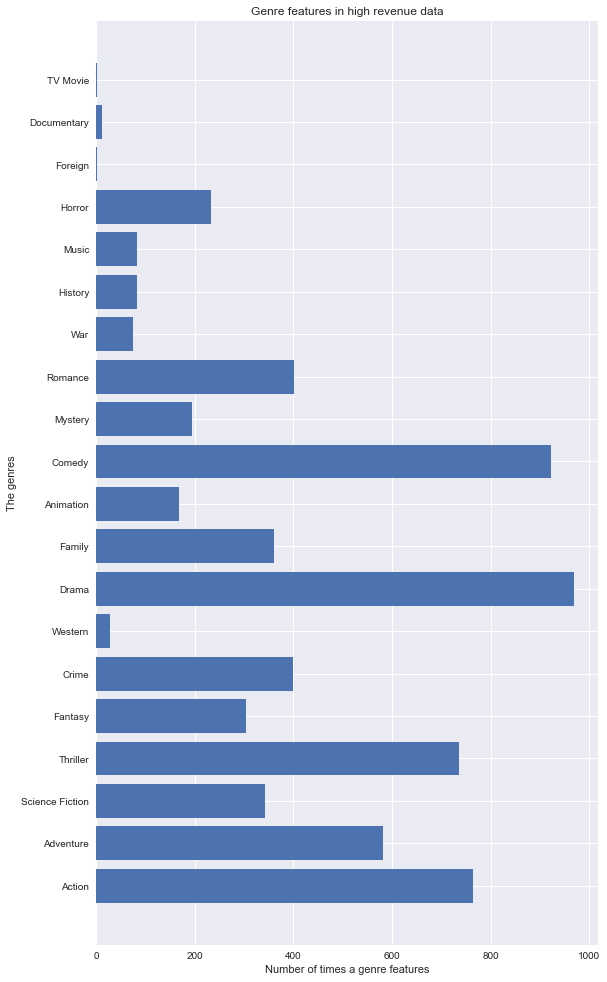

In [21]:
# plot on how particular genres featured in the dataset
plt.figure(figsize = (9, 17))
plt.barh(highgenre, appearances)
plt.title('Genre features in high revenue data')
plt.ylabel('The genres')
plt.xlabel('Number of times a genre features');
# plt.grid()

In our high revenue dataset, we see particular genres feature prominently, out of the 2425 entries, Drama and Comedy feature in more than 900 entries which could be a factor that escalates a movie's popularity hence fetching more revenue. Action and Thriller presence is equally significant with over 700 entries, therefore genre is factor that is associated with high revenue movies

How does the year a movie is released associated with a high revenue. We look at this using a histogram

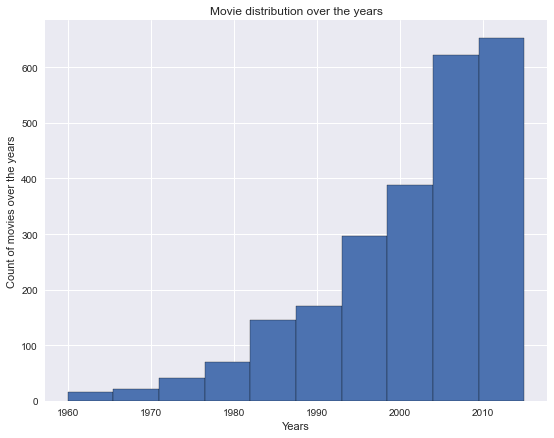

In [22]:
# plot a chart on high generating movies over the years.
def pltgraph(cl, t,x,y):
    plt.figure(figsize = (9, 7))
    plt.hist(cl, edgecolor ='black')
    plt.title(t)
    plt.ylabel(y)
    plt.xlabel(x)
pltgraph(higherthanmediandf['release_year'],"Movie distribution over the years" , 'Years','Count of movies over the years');

From the histogram, it shows that, high revenue movies were mostly registered in the most recent releases. From 1990, there was a sigificant increase of movies that generated more revenues as compared to 1970 and earlier.

What about runtime? Let's see this with a scatter plot

Text(0.5, 0, 'Count of movies')

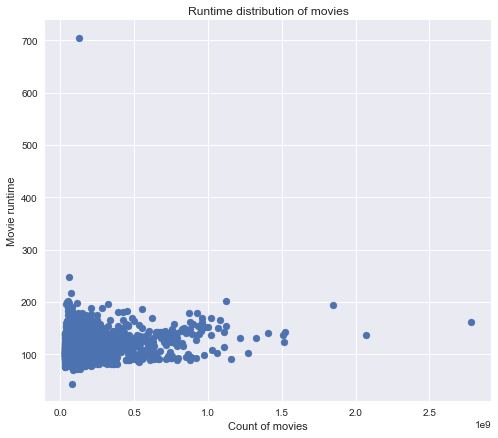

In [23]:
# A scatter plot on runtime distribution of high revenue generating movies
plt.figure(figsize = (8, 7))
plt.scatter(higherthanmediandf['revenue'], higherthanmediandf['runtime']);
plt.title("Runtime distribution of movies")
plt.ylabel('Movie runtime')
plt.xlabel('Count of movies')

The average runtime of high revenue movies was around 110. Movies that brought in more revenue had a runtime of between 44 and 200 mostly, although there was one outlier with a runtime of 700.

How about budget, is it associated with high revenue data

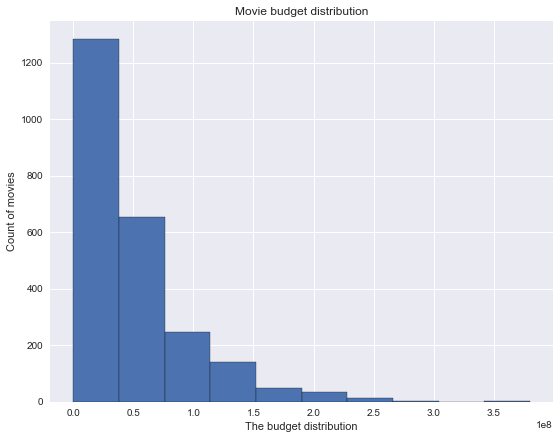

In [24]:
# plot distribution of movies' budget
pltgraph(higherthanmediandf['budget'],"Movie budget distribution", 'The budget distribution','Count of movies');

This is skewed to the right, although, there are movies that generated revenue with zero budget, the number was near too small as compared to movies that had a budget. Which goes to show, that movies that were budgeted for ended up fetching high revenue.

While continuing with the analysis, i came accross columns (cast and production_companies) with null values. Since they were not that many, they were filled with a random name from one of the original title column

In [25]:
# Fill null value with a random name from the original title column
higherthanmediandf['cast'].fillna(value = 'Obama', inplace=True)
higherthanmediandf['production_companies'].fillna(value = 'Obama', inplace=True)

c:\users\wangui\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


How did the production companies feature in the high revenue data.

In [26]:
producers = higherthanmediandf['production_companies']

prod_comp = Counter()
for producer in producers:
    prod_comp.update(producer.split('|'))

company = []
features = []


for cf in prod_comp.most_common(20):
    company.append(cf[0])
    features.append(cf[1])

print(company)
print()
print((features))
total = 0
for item in features:
    total +=item
print(total)
    


['Universal Pictures', 'Warner Bros.', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'Walt Disney Pictures', 'New Line Cinema', 'Touchstone Pictures', 'Relativity Media', 'Columbia Pictures Corporation', 'Metro-Goldwyn-Mayer (MGM)', 'Village Roadshow Pictures', 'DreamWorks SKG', 'Regency Enterprises', 'Amblin Entertainment', 'TriStar Pictures', 'Dune Entertainment', 'Fox 2000 Pictures', 'Miramax Films', 'Legendary Pictures']

[275, 274, 217, 176, 150, 112, 112, 95, 86, 79, 75, 66, 66, 58, 55, 46, 42, 41, 39, 36]
2100


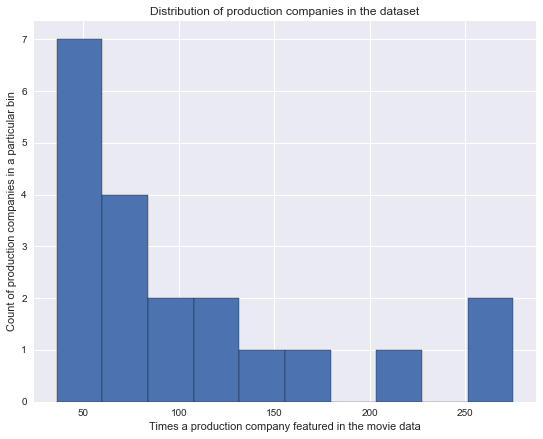

In [27]:
# Plot on how production companies featured in the high revenue generating movies.

pltgraph(features,"Distribution of production companies in the dataset",'Times a production company featured in the movie data', 'Count of production companies in a particular bin')

From the production companies histogram, it's quite visible that high revenue is associated with production companies, given the number of times a company features in the high revenue data. We have companies with over 200 movies in the dataset, therefore making it a significant factor. 

# Conclusions

From the analysis, it shows that, over the years, there has been a steady increase of movies production. With the increase of movies production, saw a steady rise of movies that generate revenue as compared to earlier years. Also, particular production companies are poised to produce high revenue generating movies. 

# Limitations

1. In the analysis of most popular genres over the years, the data presents a combination of different genre sets, while in the analysis, we considered a genre in its individuality and therefore we may never know the significance of genres that featured less in combination with the popular ones.


2. While plotting the distribution of production companies, we have picked the 20 most common of the companies against a total count of over 1900 companies. The figure is a small sample of the whole dataset, and therefore the significance of the companies not plotted may not be well presented.

 

# References

1. Course notes
2. N/A

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0